In [ ]:
'''
+------------------+--------------------------------------------------------------+
│ Column Name      │ Description                                                  │
│------------------│--------------------------------------------------------------│
+------------------+--------------------------------------------------------------+
│ Year             | Reference Year                                               |
| Month            | Reference Month                                              │
│ GEO*              │ Geographic region (encoded as Province 1, Province 2, etc.)  │
│ Products*         │ Name of the retail product                                   │
│ COORDINATE*       │ Internal coordinate identifier for product                   │
│ VALUE            │ Original product price per unit (before tax)                 │
│ UOM*              │ Unit of measure (e.g., Dollars)                              │
│ Taxable          │ 'Yes' if the product is subject to tax, 'No' otherwise       │
│ Total tax rate   │ Total tax rate (%) based on province or average for 'Canada' │
│ Value after tax  │ Price after tax if taxable, else same as VALUE               │
│ Product Category* │ High-level category assigned to the product                  │
│ Essential*        │ 'Essential' for basic needs or 'Non-Essential'               │
+------------------+--------------------------------------------------------------+
'''

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA_PATH = 'data\\Retail_Prices_of _Products.csv'

In [ ]:
data= pd.read_csv(DATA_PATH)
# data

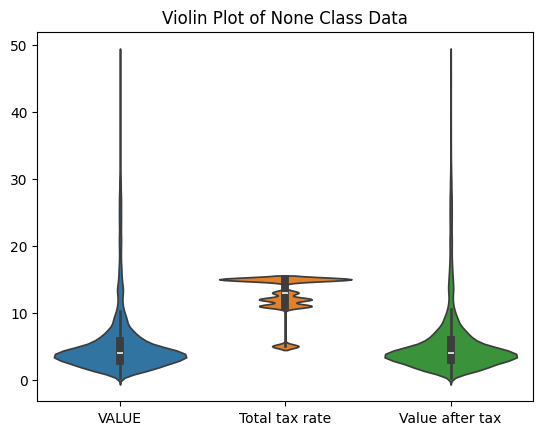

In [20]:
#반응 변수는 Value after tax으로 하고, 다른것들중에 설명변수
#각 품목을 기준으로, 시간대별 정렬. 그다음에 분석
none_class_data=data[["VALUE","Total tax rate","Value after tax"]].copy()

sns.violinplot(data=none_class_data)
plt.title("Violin Plot of None Class Data")
plt.show()


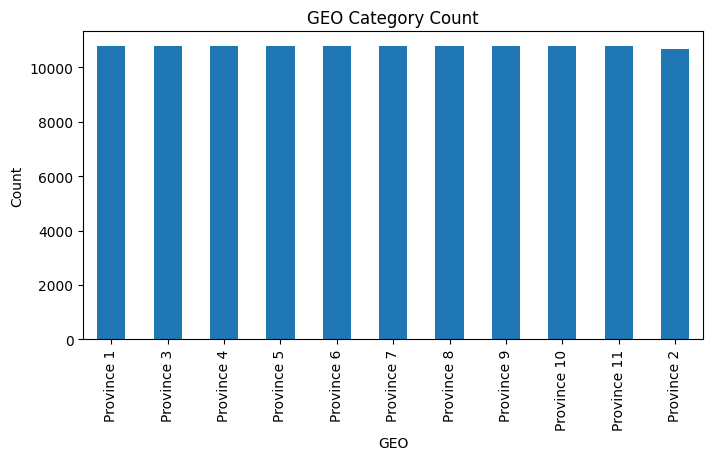

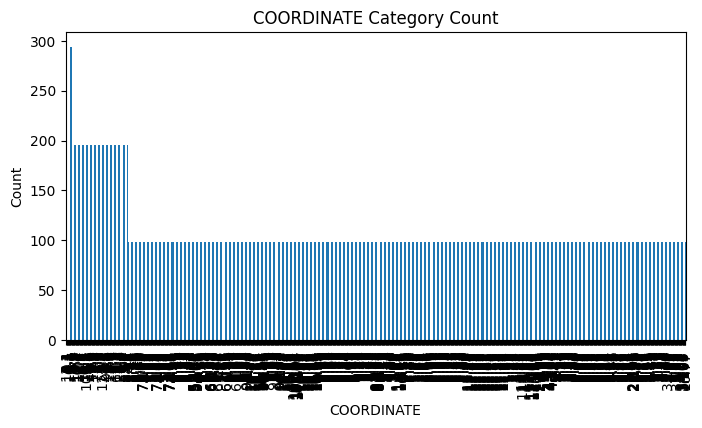

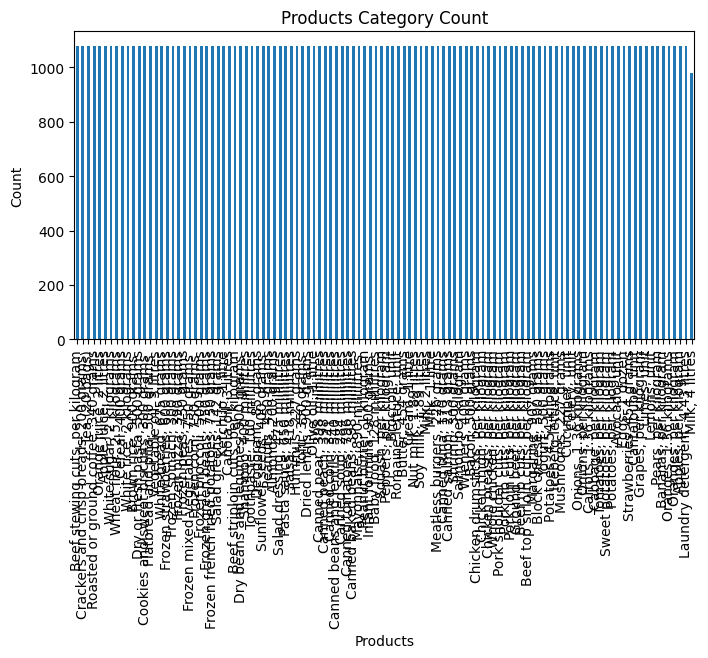

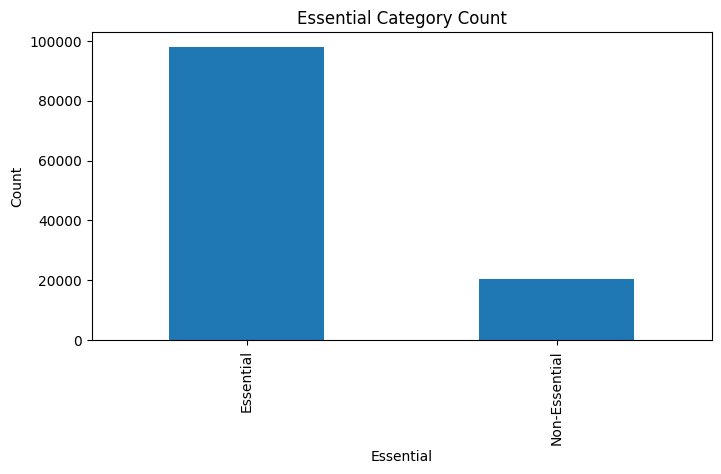

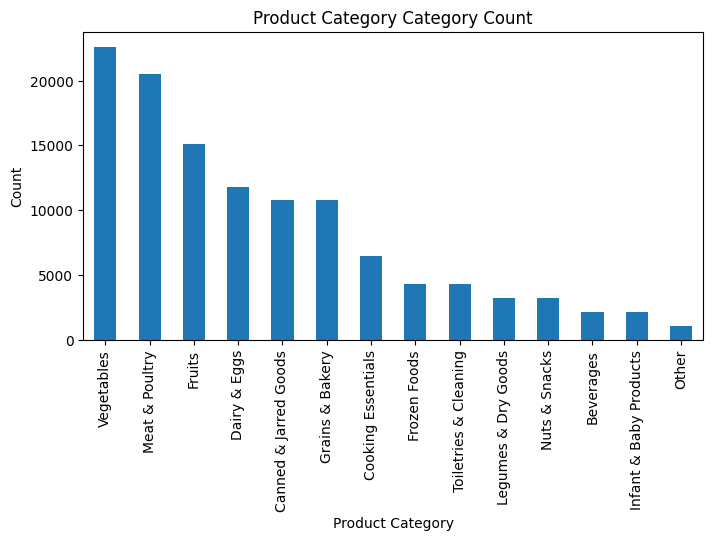

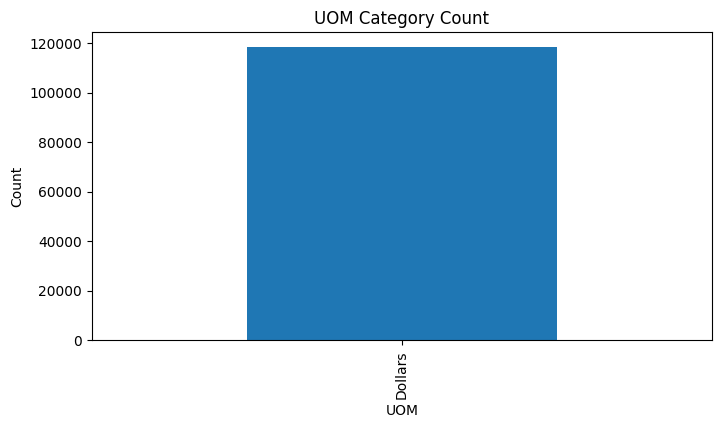

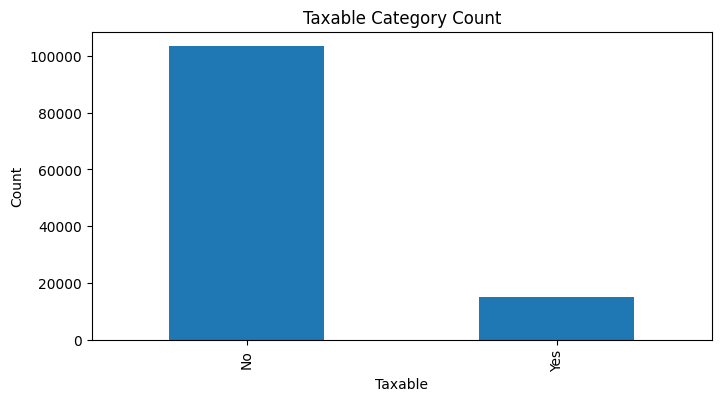

In [19]:
#범주형들의 비율 그림
categorical_columns = ["GEO", "COORDINATE", "Products", "Essential", "Product Category", "UOM", "Taxable"]
# categorical_columns = ["GEO","Essential", "Product Category", "Taxable"]

class_data=data[categorical_columns].copy()


# 각 범주형 데이터에 대해 막대그래프 그리기
for column in categorical_columns:
    plt.figure(figsize=(8, 4))
    class_data[column].value_counts().plot(kind='bar')
    plt.title(f'{column} Category Count')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()
    

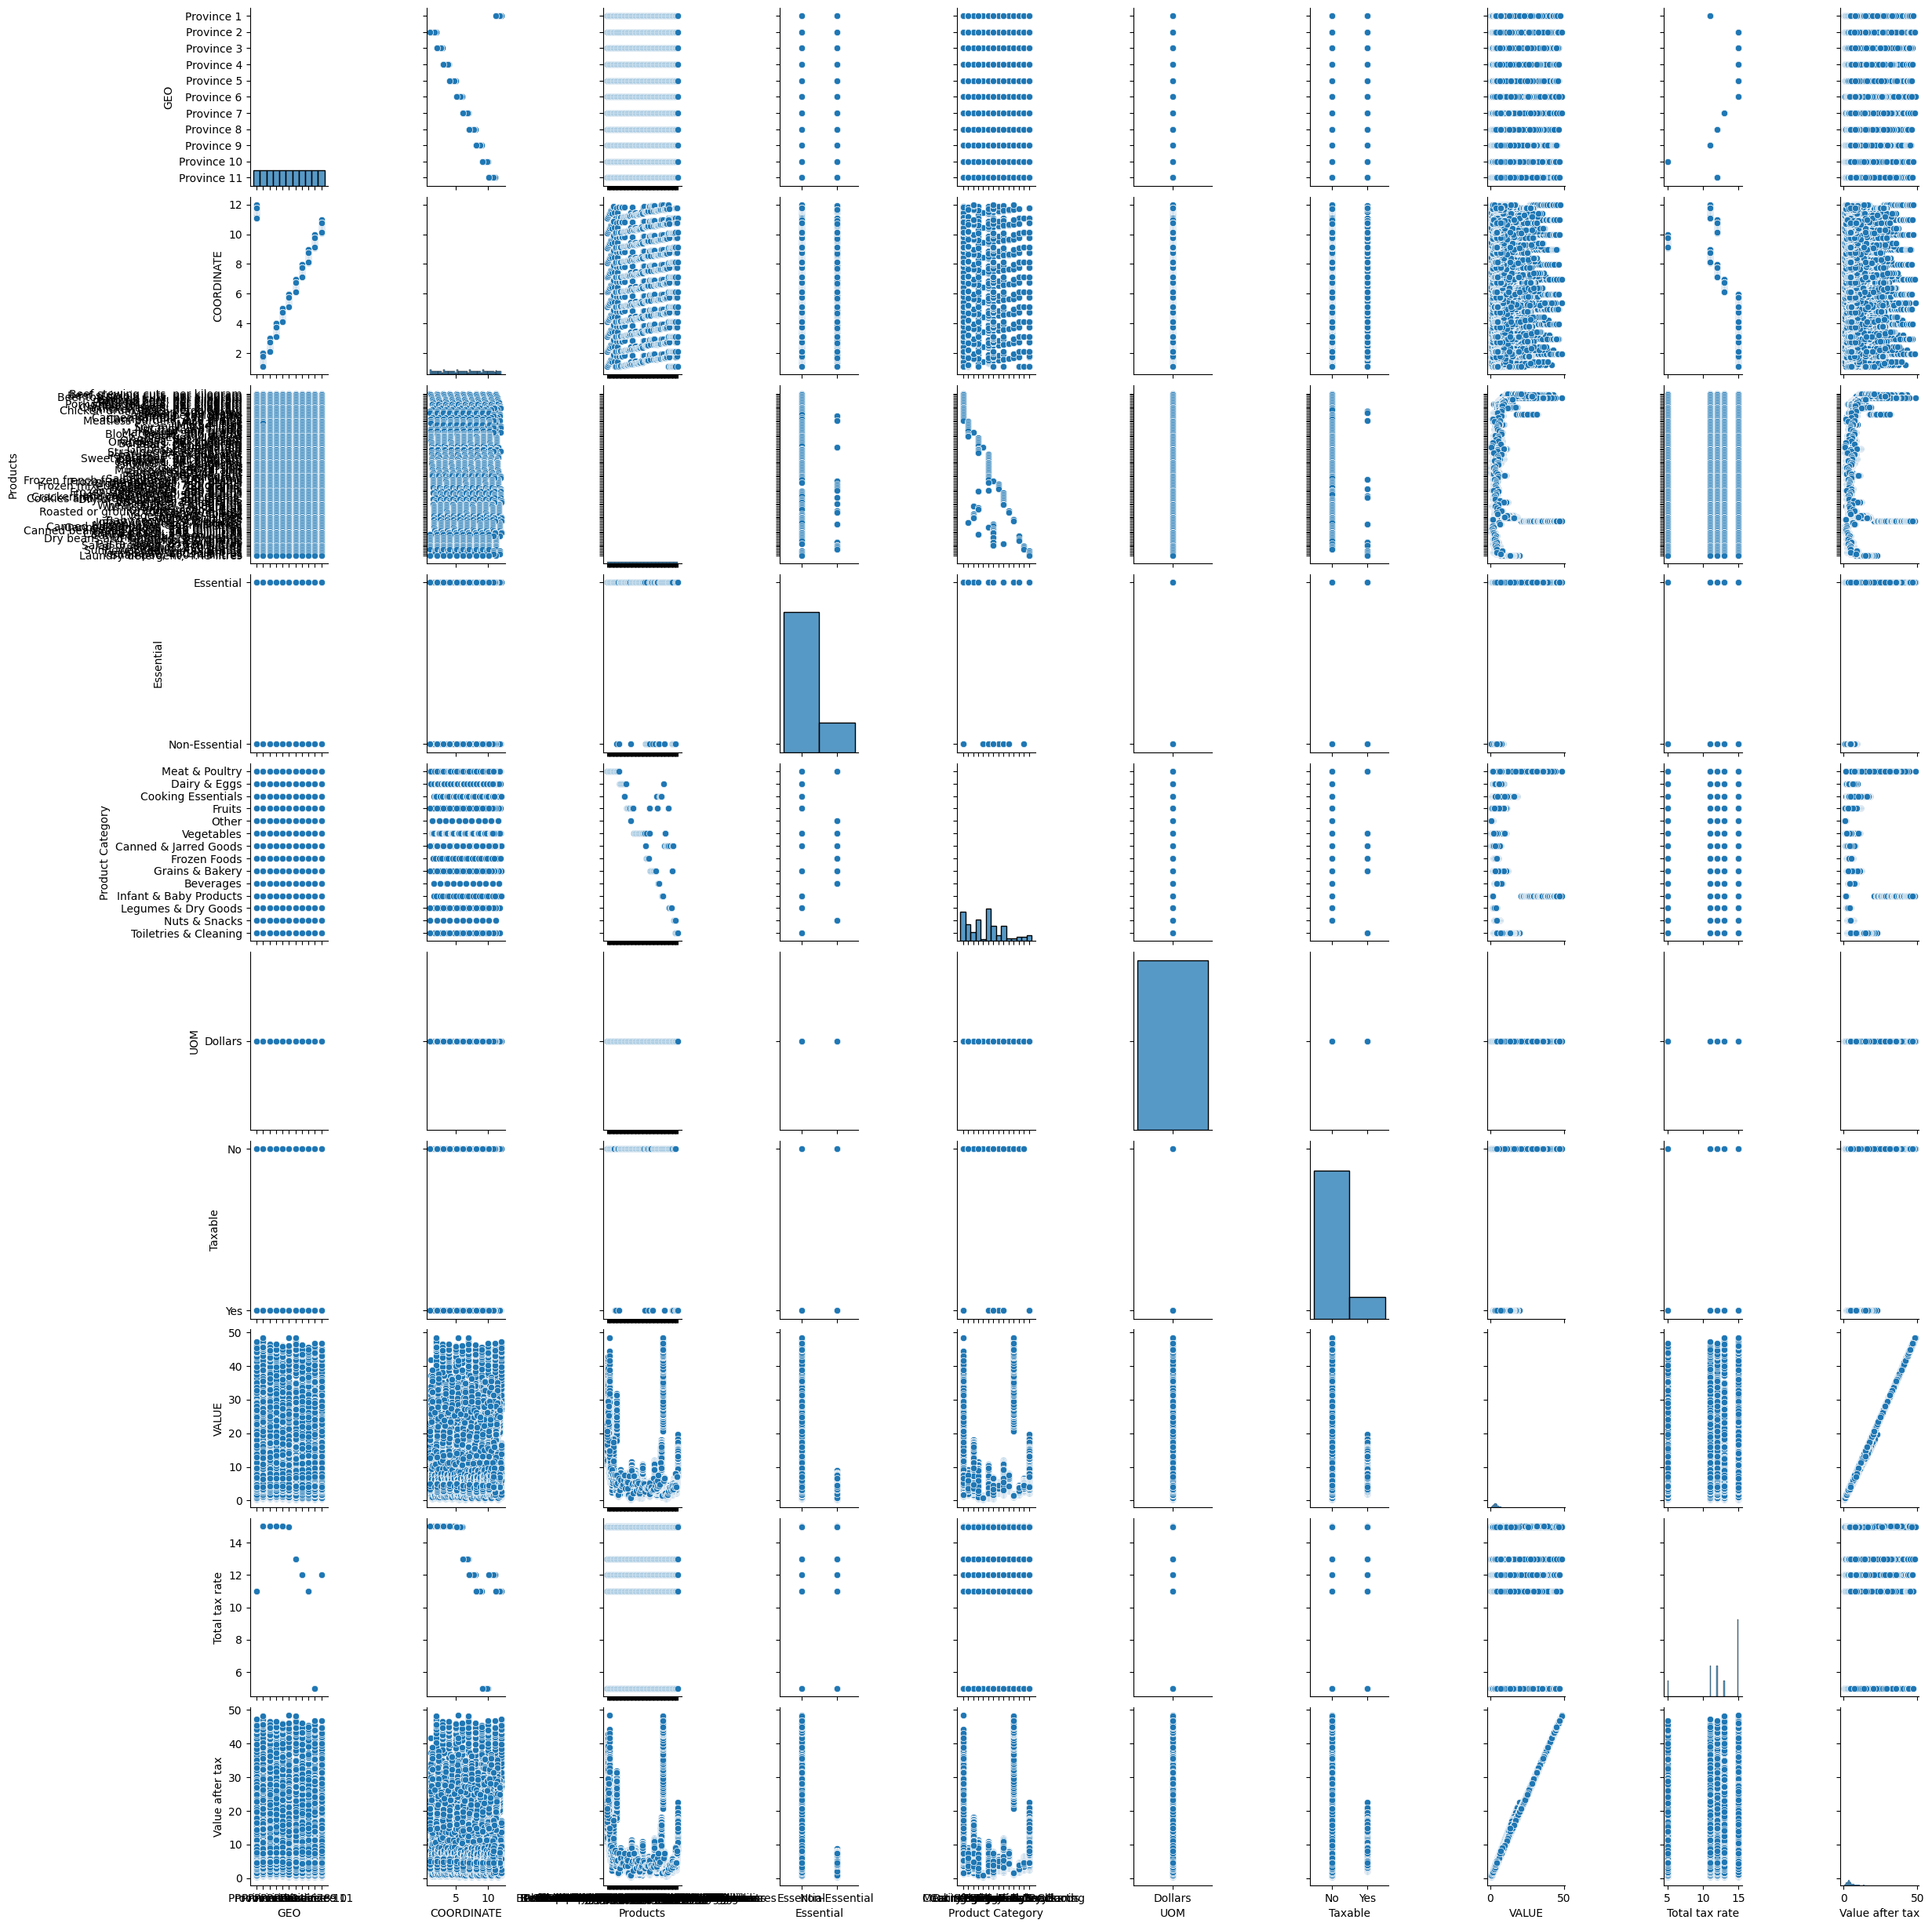

In [24]:
#설명변수와 반응변수간의 산점도
variables = categorical_columns+none_class_data.columns.tolist()

sns.pairplot(data, vars=variables)
plt.show()
# for var in variables:
#     plt.figure(figsize=(8, 6))
#     plt.scatter(data[var], data["Value after tax"])
#     plt.title(f'Scatter Plot of {var} vs Value after tax')
#     plt.xlabel(var)
#     plt.ylabel('Value after tax')
#     plt.show()


In [32]:

#필요없는 데이터들을 제외외
new_data=data[['Year','Month','GEO','Product Category','VALUE','Taxable','Total tax rate','Value after tax','Essential']].copy()
#월과 년을 합쳐서 시계열 데이터로 변환
month_to_number = {
    "January": "01", "February": "02", "March": "03", "April": "04",
    "May": "05", "June": "06", "July": "07", "August": "08",
    "September": "09", "October": "10", "November": "11", "December": "12"
}

new_data["Month"] = new_data["Month"].map(month_to_number)
new_data["date"] = new_data["Year"].astype(str) + new_data["Month"].astype(str)
new_data["date"] = pd.to_datetime(new_data["date"], format="%Y%m")
new_data.set_index("date", inplace=True)
new_data.sort_index(inplace=True)
new_data.drop(columns=["Year", "Month"], inplace=True)

new_data


,GEO,Product Category,VALUE,Taxable,Total tax rate,Value after tax,Essential
date,,,,,,,
2017-01-01,Province 1,Meat & Poultry,12.66,No,11.0,12.66,Essential
2017-01-01,Province 1,Meat & Poultry,21.94,No,11.0,21.94,Essential
2017-01-01,Province 1,Meat & Poultry,13.44,No,11.0,13.44,Essential
2017-01-01,Province 1,Meat & Poultry,20.17,No,11.0,20.17,Essential
2017-01-01,Province 1,Meat & Poultry,9.12,No,11.0,9.12,Essential
...,...,...,...,...,...,...,...
2025-02-01,Province 11,Nuts & Snacks,4.50,No,12.0,4.50,Non-Essential
2025-02-01,Province 11,Toiletries & Cleaning,8.07,Yes,12.0,9.04,Essential
2025-02-01,Province 11,Toiletries & Cleaning,4.13,Yes,12.0,4.63,Essential


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
